In [24]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
%matplotlib inline

In [25]:
train = pd.read_csv('datadata.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Image,Emotion
0,01920_horror_detect.jpg,Fear
1,11920_horror_detect.jpg,Fear
2,21920_horror_detect.jpg,Fear
3,31920_horror_detect.jpg,Fear
4,41920_horror_detect.jpg,Fear


In [26]:
train.columns

Index(['Image', 'Emotion'], dtype='object')

In [36]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/Users/peyamowar/Peya_emotion_detection/datadata/'+str(train['Image'][i]),target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)




  0%|          | 0/1220 [00:00<?, ?it/s]


  1%|▏         | 17/1220 [00:00<00:07, 165.23it/s]


  3%|▎         | 34/1220 [00:00<00:07, 164.81it/s]


  4%|▍         | 51/1220 [00:00<00:07, 165.48it/s]


  6%|▌         | 68/1220 [00:00<00:06, 165.14it/s]


  7%|▋         | 84/1220 [00:00<00:07, 161.06it/s]


  8%|▊         | 100/1220 [00:00<00:07, 158.12it/s]


  9%|▉         | 115/1220 [00:00<00:07, 152.61it/s]


 11%|█         | 129/1220 [00:00<00:07, 147.92it/s]


 12%|█▏        | 144/1220 [00:00<00:07, 148.20it/s]


 13%|█▎        | 160/1220 [00:01<00:07, 151.40it/s]


 14%|█▍        | 176/1220 [00:01<00:06, 153.38it/s]


 16%|█▌        | 192/1220 [00:01<00:06, 152.44it/s]


 17%|█▋        | 208/1220 [00:01<00:06, 150.47it/s]


 18%|█▊        | 224/1220 [00:01<00:06, 152.55it/s]


 20%|█▉        | 240/1220 [00:01<00:06, 154.58it/s]


 21%|██        | 256/1220 [00:01<00:06, 147.17it/s]


 22%|██▏       | 271/1220 [00:01<00:06, 137.98it/s]


 23%|██▎       | 285/1220 [00:01<00:06, 1

In [37]:
X.shape

(1220, 400, 400, 3)

In [39]:
from keras.utils import to_categorical
y = train.drop(['Image'],axis=1)
y.shape
le=LabelEncoder()
ds=y.apply(le.fit_transform)
y=np.array(ds)
print(np.unique(y))
print(le.inverse_transform([0,1,2,3,4,5,6,7,8,9]))
y=to_categorical(y)
print(y.shape)

[0 1 2 3 4 5 6 7 8]
['Anger' 'Disgust' 'Fear' 'Happy' 'Joy' 'Love' 'Neutral' 'Sadness'
 'Surprise']
(1220, 9)


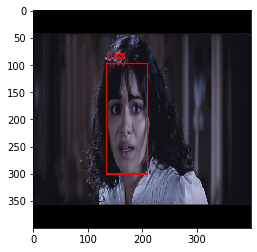

In [40]:
plt.imshow(X[2])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [46]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 93, 93, 64)       

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)
#model.fit(X_train, y_train, epochs=10, batch_size=16)

Train on 1098 samples, validate on 122 samples
Epoch 1/10
1098/1098 [==============================] - 230s 209ms/step - loss: 1.9182 - accuracy: 0.3643 - val_loss: 1.9701 - val_accuracy: 0.4836
Epoch 2/10
1098/1098 [==============================] - 209s 191ms/step - loss: 1.6583 - accuracy: 0.3588 - val_loss: 1.7430 - val_accuracy: 0.5164
Epoch 3/10
1098/1098 [==============================] - 203s 185ms/step - loss: 1.5592 - accuracy: 0.4126 - val_loss: 1.5755 - val_accuracy: 0.5820
Epoch 4/10
1098/1098 [==============================] - 202s 184ms/step - loss: 1.3090 - accuracy: 0.5219 - val_loss: 1.1193 - val_accuracy: 0.6557
Epoch 5/10
1098/1098 [==============================] - 194s 177ms/step - loss: 1.0384 - accuracy: 0.5883 - val_loss: 0.8166 - val_accuracy: 0.7951
Epoch 6/10
1098/1098 [==============================] - 211s 192ms/step - loss: 0.8049 - accuracy: 0.7022 - val_loss: 0.5639 - val_accuracy: 0.8607
Epoch 7/10
1098/1098 [==============================] - 216s 197m

In [50]:
model.evaluate(X_test, y_test)

122/122 [==============================] - 5s 41ms/step


[0.27133546989472185, 0.9344262480735779]

In [52]:
img = image.load_img('/Users/peyamowar/Peya_emotion_detection/datadata/157force2_action_detect.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [55]:
proba = model.predict(img.reshape(1,400,400,3))
print(proba)

[[0.33584222 0.00113271 0.00139002 0.0153666  0.00225962 0.0045892
  0.6302018  0.00369049 0.00552732]]


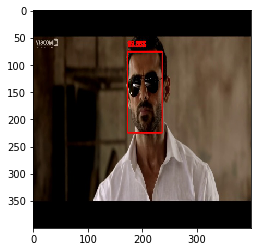

In [58]:
plt.imshow(img)

In [74]:
print(le.inverse_transform([np.argsort(proba[0])[0]]))

['Disgust']


In [75]:
img = image.load_img('/Users/peyamowar/Peya_emotion_detection/datadata/303kesari_drama_detect.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [76]:
proba = model.predict(img.reshape(1,400,400,3))
print(proba)

[[9.6206748e-01 1.2041255e-04 7.8480320e-05 4.0364533e-04 3.2749896e-05
  1.8735981e-04 3.6730789e-02 1.7072701e-04 2.0824201e-04]]


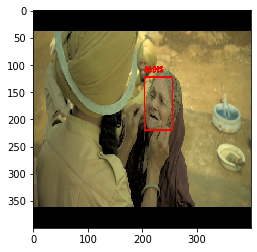

In [77]:
plt.imshow(img)

In [78]:
print(le.inverse_transform([np.argsort(proba[0])[0]]))

['Joy']


In [79]:
img = image.load_img('/Users/peyamowar/Peya_emotion_detection/datadata/434missionmangal_drama_detect.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [80]:
proba = model.predict(img.reshape(1,400,400,3))
print(proba)

[[5.2368408e-04 7.0528149e-06 7.9273641e-06 1.8884998e-04 8.7916247e-05
  3.0575600e-04 9.9882168e-01 4.8518548e-05 8.4072117e-06]]


In [81]:
print(le.inverse_transform([np.argsort(proba[0])[0]]))

['Disgust']


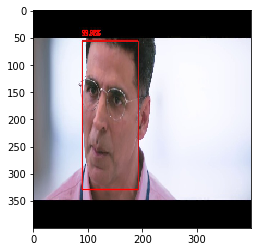

In [82]:
plt.imshow(img)

In [83]:
img = image.load_img('/Users/peyamowar/Peya_emotion_detection/datadata/284sultan_drama_detect.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [84]:
proba = model.predict(img.reshape(1,400,400,3))
print(proba)

[[0.37057996 0.01381918 0.00552924 0.03279217 0.00839393 0.04853367
  0.47341025 0.01327008 0.03367157]]


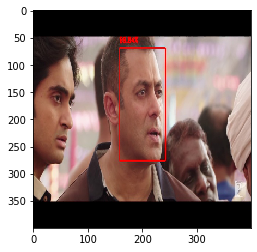

In [85]:
plt.imshow(img)

In [86]:
print(le.inverse_transform([np.argsort(proba[0])[0]]))

['Fear']


In [87]:
img = image.load_img('/Users/peyamowar/Peya_emotion_detection/datadata/124kesari_drama_detect.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [88]:
proba = model.predict(img.reshape(1,400,400,3))
print(proba)

[[0.20948024 0.12490966 0.04727758 0.08997221 0.04041255 0.19435517
  0.15297511 0.06377923 0.07683823]]


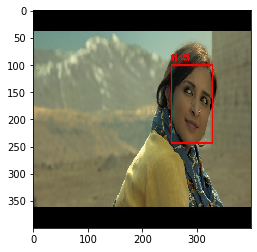

In [89]:
plt.imshow(img)

In [90]:
print(le.inverse_transform([np.argsort(proba[0])[0]]))

['Joy']
